# C207 Activity Sheet 18 Solutions

<img src="grain_abs.png" width=400>
Emissivity coefficients, from Chiang et al. (2001, ApJ, 547, 1077). Note that $\log\epsilon$ represents the natural logarithm.

# Problem 1. Grain Absorption

Explain the structure you see in the _emissivities_ plotted above
as a function of wavelength and grain size.
How would these curves look different for absorption? Scattering?

__Answer:__
On the right side of the curve, we are in the Rayleigh limit, and we see emissivities dying off
as $\lambda^{-1}$.  On the left side, we are in the geometric limit and we see little dependence
on grain size or composition (although small iron grains are doing something interesting).  In between
these limits, we see structure that Mie Theory would explain as variations in the index of refraction
of the material owing to the presence of resonant molecular transitions.  Overall, we see that larger
grains leave the geometric limit later (as expected).  As we know from Kirckoff's Law, good emitters are
good absorbers, so we can read emissivity equivalently as $Q_{abs}$.  Similarly, diffractive scattering would
have a $\lambda^{-4}$ dependence in the Rayleigh limit.

# Problem 2. Foggy, Foggy Dew

Why do you need to dim your headlights when it is foggy but not when it is raining?  
Does fog/rain impact the light seen by oncoming cars from your headlights?

__Answer:__
Droplets of rain are larger than droplets of fog, making the scattering from rain much more directed in
the forward direction than for fog.  For thick fog, this leads to a "white out" effect where scattering
redirects light back at the driver from many directions, making it hard to see.  For an oncoming car that
is not directly in the path of the oncoming headlight beam, fog 
will also increase the amount of light it receives. This light will appear to come from a larger
angular area around the oncoming headlights, making it harder for them to see as well.

# Problem 3. Nothing But Blue Skies

How much more blue than red is in "sky blue" (including the effects of optical thickness?
(The scale height of our atmosphere is roughly $\sim10$ km).
How big are the scatterers that cause our sky to be blue?

In [1]:
# Calculations here
import numpy as np
theta = np.deg2rad(15) # angle for "sunset"
h = 10 # km
d = h / np.sin(theta)
print('Sunset atmospheric distance: %4.1f km' % d)
print('Ratio I_blue/I_red: %4.1f' % ((1-np.exp(-1)) / (1-np.exp(-1/16))))

Sunset atmospheric distance: 38.6 km
Ratio I_blue/I_red: 10.4


__Answer:__
If we start out with white light, then the difference in color comes from the variation in the cross section
of the scatterers with wavelength.  To have such a strong blue bias, this has to be a result of 
Rayleigh scattering, with $\sigma\propto\lambda^{-4}$.  Optical light covers about an octave, so we can
assume that $\sigma_{blue}\sim16\sigma_{red}$.

Now you might think this translates into sky
blue having 16 times more blue than red, but that is only true in the optically thin case.
To figure out if we are optically thick, we can use the fact that sunsets are red about 1 hour (15 degrees)
before the sun disappears. This means we must be absorbing out most of the blue light at $\tau\sim3$ (our perception limit) when going though about 4 times more atmosphere (see calculation above). This implies that we should be about $\tau\sim1$ for scattering.

So if $N\sigma_{blue}\sim1$,
we get $(1-e^{-1})/(1-e^{-1/16})$ more blue than red.  Numerically, this is about a factor of 10.

Finally, to be in the Rayleigh limit, we need our particles to be smaller than the $\lambda/2\pi$ for blue light.
This corresponds to a radius of $r<60$ nm.  These are small (but not quite atomic scale) particles.

# Problem 4. Our Pale Blue Dot

What effect, if any, do blue skies have on the distribution of solar heating on the surface of the planet?
Does the presence of blue light scatterers have a net warming or cooling effect overall? Is that effect latitude dependent?

__Answer:__
The fact that we have Rayleigh scatterers in out atmosphere, to first order, is going to have a small net cooling effect, because some blue light is going to scatter off into space (hence, our appearance as a "pale blue dot"). That's light we didn't absorb, so we are cooler than without such scatterers.

The question of distribution is a more interesting one. Suppose the sun is over the equator (near equinox). The flux received direction from the sun on the surface of the earth (neglecting absorption) goes as $\cos({\rm lat})$ with latitude, simply because of surface projection. The individual particles that are Rayleigh scattering, though, are able to scatter whatever light gets to them through the atmosphere without this effect (they are round), and re-radiating isotropically, they can direct some light downward that wouldn't have gotten there before, effectively adding some heating.

The question is, how much?

Our calculation in Problem 3 indicated that we are becoming quite optically thick to blue scattering at 40 km, so depending on how much atmosphere the scatterers above your head are looking through, they will redirect some fraction of that downward, and that fraction is going to be latitude dependent:

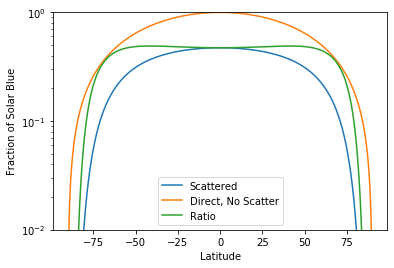

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
SIZE = 1024
LAT = np.deg2rad(85)
height = 10 # km
h2tau = 3. / 40 # km^-1
theta = np.linspace(-np.pi/2, np.pi/2, SIZE)
d = h / np.cos(theta)
plt.figure()
plt.semilogy(np.rad2deg(theta), np.exp(-d * h2tau), label='Scattered')
plt.semilogy(np.rad2deg(theta), np.cos(theta), label='Direct, No Scatter')
plt.semilogy(np.rad2deg(theta), np.exp(-d * h2tau) / np.cos(theta), label='Ratio')
plt.ylabel('Fraction of Solar Blue')
plt.xlabel('Latitude')
plt.legend()
_ = plt.ylim(1e-2,1)